# Sistema de Empréstimos - Pré-processamento dos dados

![image-2.png](attachment:image-2.png)

# Importando as Bibliotecas

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importando o Dataset

In [16]:
data=pd.read_csv('loan_dataset.csv')

# Resumindo o dataset

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data.shape

(614, 13)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Tratamento de Variáveis Categóricas

In [21]:
categorical_variables=['Gender','Married','Dependents','Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
print('Lista de variáveis categóricas :\n')
for i in range (len(categorical_variables)):
    print(categorical_variables[i])

Lista de variáveis categóricas :

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


# Existem missing values no dataset ?

In [22]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Substituindo os missing values

Categorical variables

In [23]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Married.fillna(data.Married.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0],inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)

Numerical variables

In [24]:
data.LoanAmount.fillna(data.LoanAmount.median(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(), inplace=True)

In [25]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Nenhum missing values

# Get_dummies for Categorical Variables

In [26]:
dummies1=pd.get_dummies(data['Gender'])
dummies2=pd.get_dummies(data['Married'])
dummies2=dummies2.rename(columns = {'Yes':'Married_yes','No':'NotMarried'})
dummies3=pd.get_dummies(data['Dependents'])
dummies3=dummies3.rename(columns = {'0': 'Dependents_0','1': 'Dependents_1','2': 'Dependents_2','3+': 'Dependents_3+'})
dummies4=pd.get_dummies(data['Education'])
dummies5=pd.get_dummies(data['Self_Employed'])
dummies5=dummies5.rename(columns = {'Yes':'Self_Employed_yes','No':'NotSelf_Employed'})
dummies6=pd.get_dummies(data['Property_Area'])

In [27]:
data= pd.concat([data,dummies1],axis=1)
data= pd.concat([data,dummies2],axis=1)
data= pd.concat([data,dummies3],axis=1)
data= pd.concat([data,dummies4],axis=1)
data= pd.concat([data,dummies5],axis=1)
data= pd.concat([data,dummies6],axis=1)

# Eliminar algumas colunas par evitar a multicolinearidade
data=data.drop(['Loan_ID','Gender','Married','Property_Area','Dependents','Self_Employed','Education','NotMarried','NotSelf_Employed','Not Graduate','Female'] , axis=1)

In [28]:
print(data.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term   
0             5849                0.0       128.0             360.0  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Loan_Status  Male  Married_yes  Dependents_0  Dependents_1   
0             1.0           Y  True        False          True         False  \
1             1.0           N  True         True         False          True   
2             1.0           Y  True         True          True         False   
3             1.0           Y  True         True          True         False   
4             1.0           Y  True        False          True         False   

   Dependents_2  Dependents_3+  Graduate  Self_Employed_yes  Rural  Semiurban   
0         F

# Substituir 'Y' e 'N' na variável target para 1 e 0

In [29]:
data['Loan_Status']= data['Loan_Status'].replace(['Y'],1)
data['Loan_Status']= data['Loan_Status'].replace(['N'],0)

#  Dataset após todas as modificações

In [30]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,True,False,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,True,False,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,True,False,False,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,1,True,True,False,False,True,False,True,True,False,False,True
6,2333,1516.0,95.0,360.0,1.0,1,True,True,True,False,False,False,False,False,False,False,True
7,3036,2504.0,158.0,360.0,0.0,0,True,True,False,False,False,True,True,False,False,True,False
8,4006,1526.0,168.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True
9,12841,10968.0,349.0,360.0,1.0,0,True,True,False,True,False,False,True,False,False,True,False


# Dividir os dados em TREINO e TESTE 

In [31]:
X=data.drop(columns='Loan_Status')
Y=pd.DataFrame(data['Loan_Status'])

In [32]:
# Dividir o dataset em treino e teste. 85% para treino e 15% para teste. 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=3) # random_state é o seed para a aleatoriedade

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int64  
 6   Male               614 non-null    bool   
 7   Married_yes        614 non-null    bool   
 8   Dependents_0       614 non-null    bool   
 9   Dependents_1       614 non-null    bool   
 10  Dependents_2       614 non-null    bool   
 11  Dependents_3+      614 non-null    bool   
 12  Graduate           614 non-null    bool   
 13  Self_Employed_yes  614 non-null    bool   
 14  Rural              614 non-null    bool   
 15  Semiurban          614 non-null    bool   
 16  Urban              614 non

In [34]:
# Install pycaret package
# %pip install pycaret

from pycaret.classification import *

In [35]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Married_yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Graduate,Self_Employed_yes,Rural,Semiurban,Urban
0,5849,0.0,128.0,360.0,1.0,1,True,False,True,False,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,True,False,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,True,False,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,False,False,True,False,False,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,1,True,True,False,False,False,True,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,1,True,True,False,True,False,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,True,True,False,False,True,False,True,False,False,False,True


# Tentar os Classificadores 

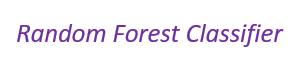

In [40]:
classifier = RandomForestClassifier(n_estimators=1000,max_features=15,max_depth=5,bootstrap=True)
classifier.fit(X_train,Y_train)
predictions = classifier.predict(X_test)
accuracyScores = accuracy_score(predictions, Y_test)
print(accuracyScores)

0.8709677419354839


In [41]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

In [42]:
import pickle

In [43]:
filename = 'Random_Forest.sav'
pickle.dump(classifier, open(filename, 'wb'))